In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve,auc
%matplotlib inline

In [2]:
iris = pd.read_csv('./data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


![image](https://i.postimg.cc/FzC0JtPg/iris.png)
![info](https://i.postimg.cc/L83LzZ08/pasted-image-0.png)

**Considering two attributes**
- PetalLength
- Petal Width

In [12]:
data = iris[['PetalLength','PetalWidth','Flower']]
data.head()

,PetalLength,PetalWidth,Flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


**Three classes** 
- Iris-setosa
- Iris-versicolor
- Iris-virginica

**Create Dummies (n-1)**

In [20]:
output = pd.get_dummies(iris['Flower'])

In [22]:
pd.concat((output,iris))

C:\Users\Srikanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Flower,Iris-setosa,Iris-versicolor,Iris-virginica,PetalLength,PetalWidth,SepalLength,SepalWidth
0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
1,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
4,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
5,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
6,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
7,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
8,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
9,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN


# visualizing data

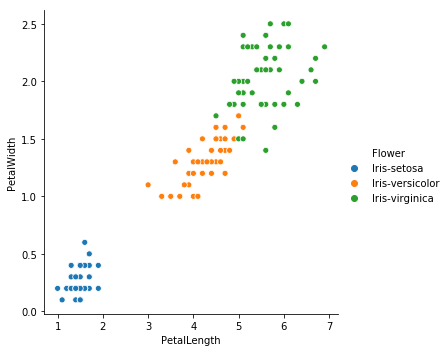

In [80]:
sns.relplot(x='PetalLength',y='PetalWidth',data=iris,hue='Flower')

# Logistic Regression for multiclass
- Number of lines the seperate n classes = n - 1

data['Flower'].replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[0,1,2],inplace=True)

In [81]:
model = smf.mnlogit(formula='Flower~PetalLength+PetalWidth',data=data).fit()

         Current function value: 0.068545
         Iterations: 35


C:\Users\Srikanth\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [82]:
print(model.summary())

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      144
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Apr 2019   Pseudo R-squ.:                  0.9376
Time:                        18:48:51   Log-Likelihood:                -10.282
converged:                      False   LL-Null:                       -164.79
                                        LLR p-value:                 1.227e-65
y=Flower[Iris-versicolor]       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -73.3855   1.62e+05     -0.000      1.000   -3.18e+05    3.18e+05
PetalLength                  20.4020   1.28e+05      0.000      1.000   -2.52e+05    2

**Two models**
1. Iris Setosa vs Iris versicolor

Eq: $ln(s) = -73.385 + 20.4020*PetalLength + 29.4197* PetalWidth $
2. Iris Setosa vs Iris Vignica

Eq: $ln(s) = -118.65 + 26.1565*PetalLength + 39.8664* PetalWidth $


In [83]:
data.head()

,PetalLength,PetalWidth,Flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


model.predict(data[['PetalLength','PetalWidth']])

In [84]:
def drawline(i,p=0.5,colour = 'b'):
    inte = model.params[i].Intercept
    pL =model.params[i].PetalLength
    pW = model.params[i].PetalWidth
    #np.log(p/(1-p)) = inte + pL*data['PetalLength'] + pW*data['PetalWidth']
    petallength = (-inte - pW*data['PetalWidth'] + np.log(p/(1-p)))/pL
    plt.plot(petallength,data['PetalWidth'])

In [93]:
def modelpredict(i,x1,x2):
    a = model.params[i].Intercept
    b1 =model.params[i].PetalLength
    b2 = model.params[i].PetalWidth
    log_or = a + b1*x1 + b2*x2
    _or = np.exp(log_or)
    probability = _or/(1+_or)
    return probability



In [100]:
def threshold(probability,thresh=0.5):
    if probability <= thresh:
        return 1
    else:
        return 0

In [86]:
data['Flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Equation - 1

In [87]:
y_set_versi = data['Flower'].replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[0,1,1])

In [95]:
y_prob = modelpredict(0,data['PetalLength'],data['PetalWidth'])
y_pred = y_prob.apply(threshold)
y_true = y_set_versi

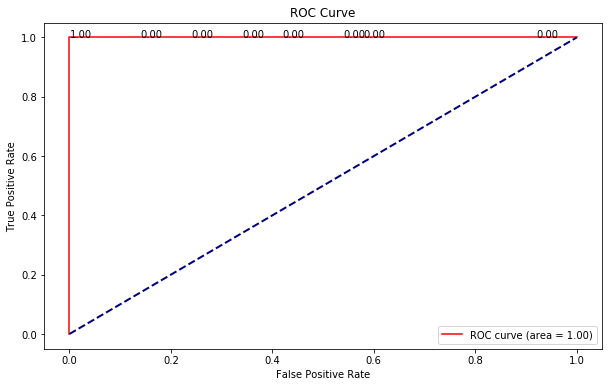

In [97]:
fpr,tpr,threshold = roc_curve(y_set_versi,y_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

AUC is good

# Equation - 2

In [110]:
def threshold(probability,thresh=0.1):
    if probability <= thresh:
        return 1
    else:
        return 0

In [111]:
y_set_veri = data['Flower'].replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[0,0,1])

In [112]:
y_prob = modelpredict(1,data['PetalLength'],data['PetalWidth'])
y_pred = y_prob.apply(threshold)
y_true = y_set_veri

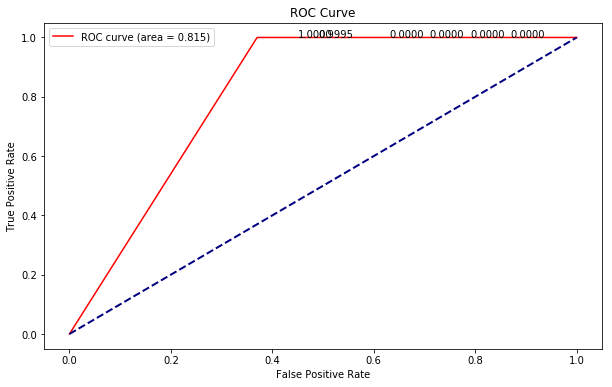

In [113]:
fpr,tpr,threshold = roc_curve(y_set_veri,y_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.4f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.3f)' % auc(fpr,tpr)])
plt.show()

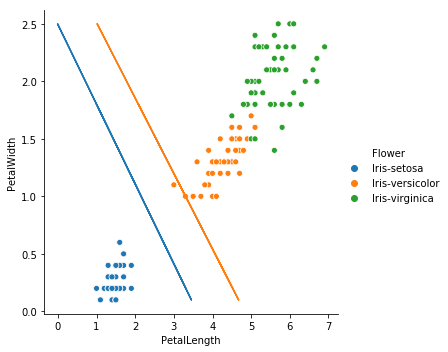

In [121]:
sns.relplot(x='PetalLength',y='PetalWidth',data=iris,hue='Flower')
drawline(0,0.5)
drawline(1,0.9995)